In [37]:
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func, select, Table, MetaData
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
#read graduation csv
df = pd.read_csv("graduation_data.csv")

#check graduation data
df.head(10)

,Board Number,Year,Board Type,Region,Grade 10 OSSLT Results,Progress in Grade 10 OSSLT Results,Credit Accumulation by the end of Grade 10,Progress in Credit Accumulation by the end of Grade 10,Credit Accumulation by the end of Grade 11,Progress in Credit Accumulation by the end of Grade 11,Four Year Graduation Rate 2017-2018 Grade 9 Cohort,Progress in Four Year Graduation Rate 2017-2018 Grade 9 Cohort
0,B28010,2021-2022,Public,North Region,0.72,0.0,0.69,-0.02,0.71,-0.08,0.718,0.018
1,B67202,2021-2022,Roman Catholic,East Region,0.86,0.0,0.84,0.00,0.87,-0.03,0.880,0.004
2,B66010,2021-2022,Public,West Region,0.81,0.0,0.81,0.03,0.78,-0.01,0.810,0.066
3,B66001,2021-2022,Public,West Region,0.75,0.0,0.67,-0.01,0.71,-0.01,0.711,0.011
4,B67164,2021-2022,Roman Catholic,West Region,0.85,0.0,0.73,-0.08,0.81,-0.01,0.797,-0.038
5,B67008,2021-2022,Roman Catholic,West Region,0.82,0.0,0.82,0.01,0.85,0.05,0.868,0.027
6,B67172,2021-2022,Roman Catholic,East Region,0.84,0.0,0.80,-0.09,0.84,-0.06,0.882,0.014
7,B66311,2021-2022,Public,East Region,0.93,0.0,0.78,-0.01,0.84,-0.06,0.915,0.008
8,B67300,2021-2022,Roman Catholic,West Region,0.85,0.0,0.91,-0.04,0.92,-0.05,0.960,0.062
9,B67318,2021-2022,Roman Catholic,Toronto Region,0.95,0.0,0.87,0.02,0.91,-0.02,0.938,0.021


In [3]:
#splitting the year variable to a single year
df["Year"] = df["Year"].str.split("-").str[0]

In [4]:
#changing the year variable to an integer
df["Year"] = df["Year"].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Board Number                                                    144 non-null    object 
 1   Year                                                            144 non-null    int64  
 2   Board Type                                                      144 non-null    object 
 3   Region                                                          144 non-null    object 
 4   Grade 10 OSSLT Results                                          144 non-null    float64
 5   Progress in Grade 10 OSSLT Results                              144 non-null    float64
 6   Credit Accumulation by the end of Grade 10                      144 non-null    float64
 7   Progress in Credit Accumulation by the end of Grade 1

In [6]:
df.sample(10)

,Board Number,Year,Board Type,Region,Grade 10 OSSLT Results,Progress in Grade 10 OSSLT Results,Credit Accumulation by the end of Grade 10,Progress in Credit Accumulation by the end of Grade 10,Credit Accumulation by the end of Grade 11,Progress in Credit Accumulation by the end of Grade 11,Four Year Graduation Rate 2017-2018 Grade 9 Cohort,Progress in Four Year Graduation Rate 2017-2018 Grade 9 Cohort
58,B28070,2021,Public,North Region,0.59,0.0,0.49,-0.14,0.58,-0.15,0.642,0.110
29,B66141,2021,Public,West Region,0.77,0.0,0.69,0.06,0.71,0.01,0.719,-0.017
79,B66311,2022,Public,East Region,0.93,0.0,0.78,-0.01,0.84,-0.06,0.897,-0.007
97,B66028,2022,Public,West Region,0.79,0.0,0.74,-0.06,0.79,-0.02,0.809,-0.018
129,B29076,2022,Roman Catholic,North Region,0.00,0.0,0.00,0.00,0.00,0.00,0.000,0.000
38,B66206,2021,Public,East Region,0.79,0.0,0.75,-0.05,0.74,-0.07,0.830,0.031
0,B28010,2021,Public,North Region,0.72,0.0,0.69,-0.02,0.71,-0.08,0.718,0.018
119,B66125,2022,Public,Central Region,0.85,0.0,0.80,0.00,0.83,-0.01,0.881,0.005
96,B66168,2022,Public,West Region,0.76,0.0,0.68,0.01,0.68,0.03,0.708,0.022
4,B67164,2021,Roman Catholic,West Region,0.85,0.0,0.73,-0.08,0.81,-0.01,0.797,-0.038


In [7]:
X = df[[col for col in df.columns if col != 'Region' and col !='Board Type' and col != "Board Number" and col != "Four Year Graduation Rate 2017-2018 Grade 9 Cohort"]]


In [8]:
X.shape

(144, 9)

In [9]:
y = df['Four Year Graduation Rate 2017-2018 Grade 9 Cohort']

In [10]:
from sklearn.model_selection import train_test_split

X_encoded = pd.get_dummies(X, columns=['Region '])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [27]:
x_test_pred = model.predict(X_test)


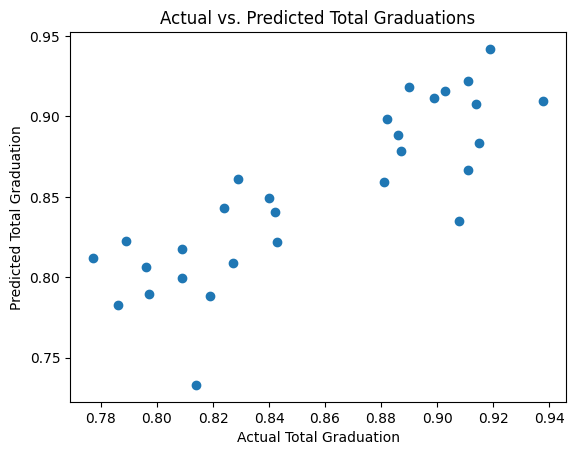

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, x_test_pred)
plt.xlabel("Actual Total Graduation")
plt.ylabel("Predicted Total Graduation")
plt.title("Actual vs. Predicted Total Graduations")
plt.show()

In [31]:
results = pd.DataFrame({"Prediction": x_test_pred[:y_test.shape[0]], "Actual": y_test}).head()
results.head()

,Prediction,Actual
117,0.922258,0.911
19,0.782678,0.786
82,0.840265,0.842
97,0.799204,0.809
56,0.817445,0.809


In [40]:
# Saving the model for later use in the app
with open("graduation_prediction_model.pkl", "wb") as file:
  pickle.dump(model, file)